In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [18]:
import os
import scipy

In [14]:
import cactas as C

In [15]:
DATAPATH = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/'

In [52]:
DATASETS = sorted([v for v in os.listdir(DATAPATH) if os.path.isdir(DATAPATH + v)])

for i, d in enumerate(DATASETS):
    
    if d!='DICOM 17':
        continue
    
    image_with_header, label_with_header = C.Util.load(i, datapath=DATAPATH, with_header=True)
    
    spacing = [image_with_header[1]['space directions'][0,0],
               image_with_header[1]['space directions'][1,1],
               image_with_header[1]['space directions'][2,2]]
    
    image = image_with_header[0]
    label = label_with_header[0]
    
    print(d, spacing)
    
    # crop according to all annotations
    image_cropped, label_cropped = C.Util.crop(image, label)
    
    # remove all slices without annotations
    image_filtered, label_filtered = C.Util.filter(image_cropped, label_cropped)
    
    label_binarized = C.Util.binarize(label_filtered)
    

DICOM 17 [0.7929687499999999, 0.7929687499999999, 1.5000000000000002]


In [53]:
image_filtered.shape

(35, 32, 20)

In [54]:
label_binarized.shape

(35, 32, 20)

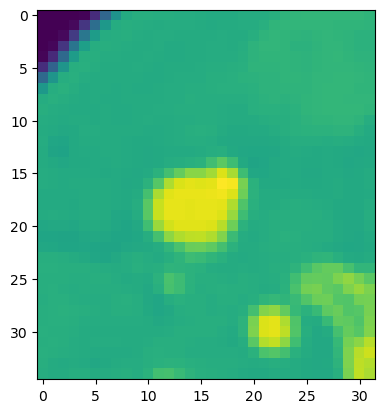

In [55]:
imshow(image_filtered[:,:,0])

In [25]:
1/0.5

4.0

In [64]:
image_zoomed = scipy.ndimage.zoom(image_filtered, [1/spacing[0],1/spacing[1],1], order=0)
label_zoomed = scipy.ndimage.zoom(label_filtered, [1/spacing[0],1/spacing[1],1], order=0)

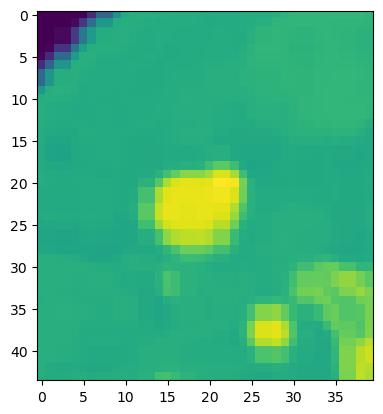

In [65]:
imshow(image_zoomed[:,:,0])

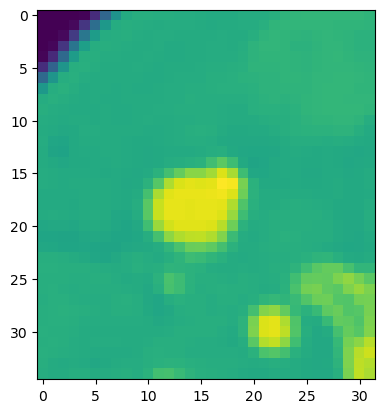

In [66]:
imshow(image_filtered[:,:,0])

In [36]:
image_zoomed.max()

1932

In [37]:
image_filtered.max()

1932

In [39]:
label_filtered.max()

3

In [40]:
label_zoomed.max()

3

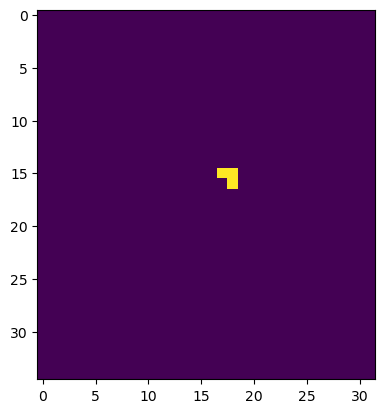

In [59]:
imshow(label_filtered[:,:,0])

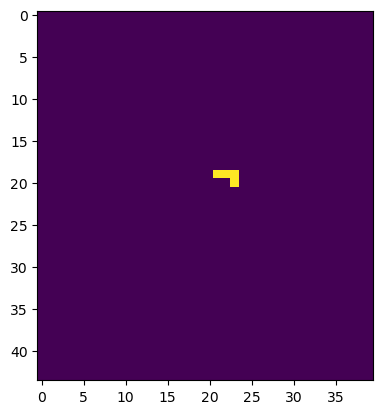

In [60]:
imshow(label_zoomed[:,:,0])